In [42]:
#libraries my version
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [43]:
df = pd.read_csv(r'C:\Users\shafi\OneDrive\Documents\Data analysis oamk\18.01.2024\oulu_apartment_data_for_analysis.csv')
df = df.replace(r'^\s*$',np.nan,regex= True) #Set NaN to replace missing cells in the data
df.dropna(inplace=True) #Drop all the rows with NaN values neural network can't handle NaN values
df = df.drop(columns= 'price_per_area') #Drop the price per area column because it is not needed
df = df.drop(columns= 'region_value')
df = df.drop(columns= 'Unnamed: 0')
df.head()

,Region,rooms,Area,Price,Year,elevator,status,plot
0,Kaukovainio,1,33.0,41500,1970,yes,good,rent
1,Myllytulli,1,37.5,96000,1992,yes,good,rent
2,Myllytulli,1,41.0,139000,2000,yes,good,own
3,Myllyoja,1,31.0,39000,1974,no,good,rent
4,Myllyoja,1,32.0,37600,1974,yes,bad,rent


In [44]:
#Data preparation
df.loc[df['elevator'].str.contains('yes', na=False),'elevator'] = 1
df.loc[df['elevator'].str.contains('no', na=False),'elevator'] = -1

df.loc[df['status'].str.contains('good', na=False),'status'] = 1
df.loc[df['status'].str.contains('fair', na=False),'status'] = 0
df.loc[df['status'].str.contains('bad', na=False),'status'] = -1

df.loc[df['plot'].str.contains('own', na=False),'plot'] = 1
df.loc[df['plot'].str.contains('rent', na=False),'plot'] = -1

#one hot encoding the region column
one_hot_encoded_region = pd.get_dummies(df['Region']).astype(int)

#Add one hot encoded columns to the dataframe
df = pd.concat([df, one_hot_encoded_region], axis=1)

#drop the region column
df = df.drop(columns= 'Region')

df.head()
#one_hot_encoded_region

,rooms,Area,Price,Year,elevator,status,plot,Alppila,Etu-lyötty,Etu-nokela,...,Taka-lyötty,Talvikangas,Taskila,Toivoniemi,Toppila,Toppilansaari,Toppilansalmi,Tuira,Välivainio,Värttö
0,1,33.0,41500,1970,1,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,37.5,96000,1992,1,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,41.0,139000,2000,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,31.0,39000,1974,-1,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,32.0,37600,1974,1,-1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#data selection and scaling


y = df['Price'] #Target variable
X = df.drop(columns= 'Price') #Feature variables

#data scaling
scaler = preprocessing.StandardScaler().fit(X) #Define the scaler
X = scaler.transform(X) #Scale the data

In [54]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #Split the data to train and test sets


#Define the model
model = MLPRegressor(hidden_layer_sizes = (20,40,20,10), max_iter=1000) #Define hyperparameters

#Train the model
model.fit(X_train, y_train)

#Check the model success
print('R^2 score with train data is ',model.score(X_train, y_train))
print('R^2 score with test data is ',model.score(X_test, y_test))

R^2 score with train data is  0.8287347349833002
R^2 score with test data is  0.6414737400911743


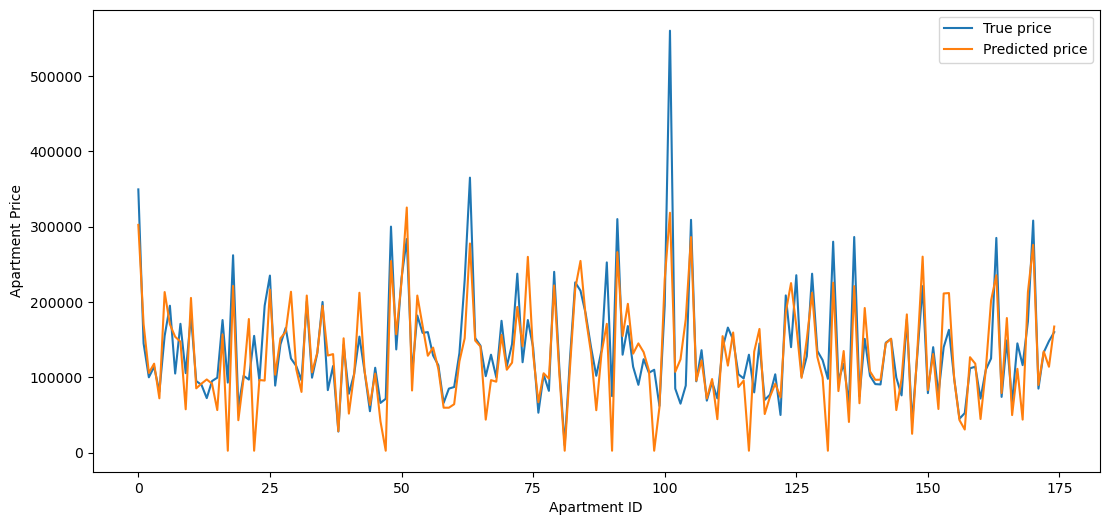

In [62]:
#Test the model
predictions = model.predict(X_test) #Predicted prices

plt.figure(figsize=(13,6))
plt.plot(y_test.values) #True price of test data
plt.plot(predictions) #Predicted price of test data
plt.legend(['True price','Predicted price'])
plt.ylabel('Apartment Price')
plt.xlabel('Apartment ID')
plt.show()

Conclusions
- Data should be extended (If possible)
- Model seems to work 